# Data Cleaning and Preprocessing
ML is a powerful tool for analyzing and interpreting data, but before we can apply any machine learning algorithms, we need to ensure that our data is clean and well-prepared. 

Garbage in, garbage out (GIGO) is a common phrase in data science, emphasizing that the quality of the input data directly affects the quality of the output. Can you list some reasons why data might be considered "dirty", and how does this affect the results of your analysis?

We'll use pandas and seaborn for data manipulation and visualization, respectively. We'll work with the `titanic` dataset, which is a classic dataset for demonstrating data cleaning and preprocessing techniques.

# Titanic Dataset (Seaborn Version) - Feature Descriptions

This dataset contains demographic and survival information about passengers on the Titanic. It is often used for demonstrating data cleaning, visualization, and classification tasks.

## Target Variable

- **`survived`** *(int)*  
  Survival indicator:  
  - `0` = Did not survive  
  - `1` = Survived  

---

## Passenger Details

- **`pclass`** *(int)*  
  Passenger class (1st, 2nd, or 3rd) — proxy for socio-economic status.

- **`sex`** *(object)*  
  Gender of the passenger: `male` or `female`.

- **`age`** *(float)*  
  Age in years. Some missing values exist.

- **`sibsp`** *(int)*  
  Number of siblings or spouses aboard.

- **`parch`** *(int)*  
  Number of parents or children aboard.

- **`fare`** *(float)*  
  Fare paid for the ticket.

- **`embarked`** *(object)*  
  Port of embarkation:  
  - `C` = Cherbourg  
  - `Q` = Queenstown  
  - `S` = Southampton

- **`class`** *(category)*  
  Duplicate of `pclass`, but as a readable label: "First", "Second", or "Third".

- **`who`** *(object)*  
  Simplified category of passenger type: "man", "woman", or "child".

- **`adult_male`** *(bool)*  
  True if the passenger is an adult male.

- **`deck`** *(category)*  
  Deck letter extracted from cabin — many missing values.

- **`embark_town`** *(object)*  
  Full name of embarkation town (duplicate of `embarked` but more readable).

- **`alive`** *(object)*  
  Human-readable survival status: "yes" or "no" (duplicate of `survived`).

- **`alone`** *(bool)*  
  True if the passenger had no family aboard (`sibsp + parch == 0`).

### AIM: We'll use the cleaned dataset to build a simple machine learning model to predict survival on the Titanic.

In [1]:
# import pandas as pd
# import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the Titanic dataset
df = sns.load_dataset("titanic")

In [3]:
# Explore the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


NOTE: Features are a proxy for real world measurements.

# Let's start the cleaning process!

Why drop rows with missing values? Or should we impute them? What about duplicate rows?

In [7]:
# Handle missing values and drop duplicates

df.dropna(subset=['age', 'embarked'], inplace=True)
# df = df.dropna(subset=['age', 'embarked'])

# Alternative
# df['age'] = df['age'].fillna(df['age'].mean())
# df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

df.drop_duplicates(inplace=True)

### Should every feature count?

The following are generally considered **redundant or derived** from other features:

- `class` → derived from `pclass`
- `who` → derived from `sex` and `age`
- `adult_male` → derived from `sex` and `age`
- `alive` → duplicate of `survived`
- `embark_town` → readable version of `embarked`
- `alone` → derived from `sibsp` and `parch`
- `deck` → sparse, many missing values

For basic analysis, you may want to drop these to simplify your dataset.

In [8]:
# Drop columns
df.drop(columns=["class", "who", "adult_male", "alive", "embark_town", "alone", "deck"], inplace=True)

# Export the cleaned dataset

In [9]:
df.to_csv("cleaned_titanic_dataset.csv", index=False)

# Some visualisations

### Equi-distrubutional?

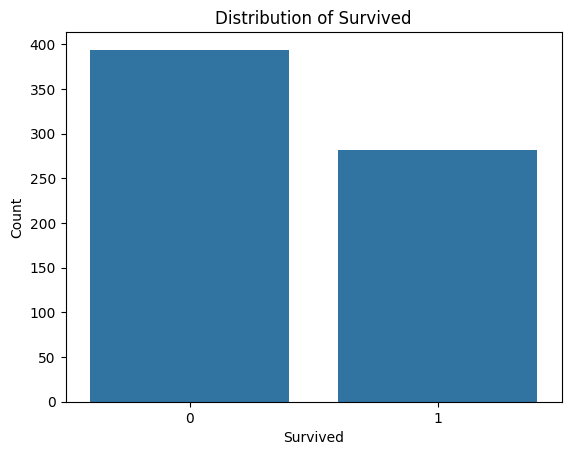

In [10]:
# Plot distribution of 0 and 1 samples
sns.countplot(x="survived", data=df)
plt.title("Distribution of Survived")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

In [11]:
# Get target
objective = df['survived']
df.drop(columns=["survived"], inplace=True)

In [12]:
# Get categorical and numerical columns
categorical_cols = ['pclass', 'sex', 'embarked']
numeric_cols = [col for col in df.columns if col not in categorical_cols]

In [13]:
def plot_categorical_feature(objective, feature):
    plt.figure(figsize=(6, 3))
    # Add your plot
    sns.countplot(x=feature, hue=objective, data=df)
    plt.title(f"Count of {feature} by Survival")
    plt.show()
    
def plot_numeric_feature(objective, feature):
    plt.figure(figsize=(6, 3))
    # Add your plot
    sns.boxplot(x=objective, y=feature, data=df)
    plt.title(f"Distribution of {feature} by Survival")
    plt.show()


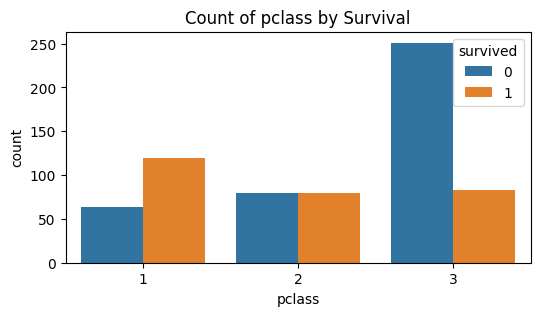

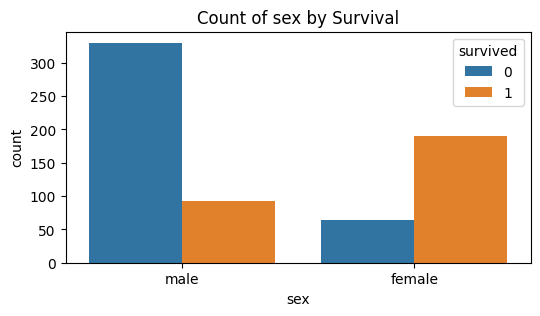

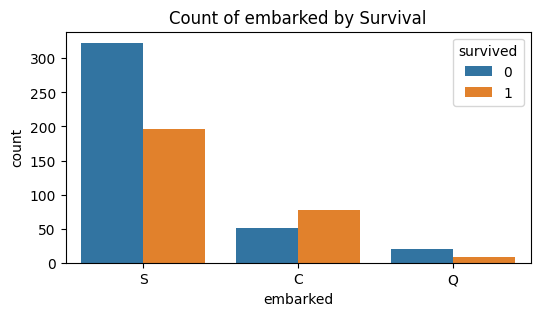

In [14]:
for feature in categorical_cols:
    plot_categorical_feature(objective, feature)

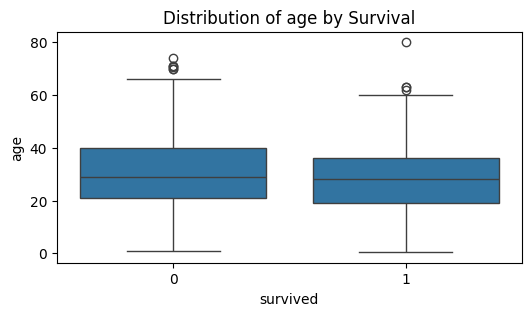

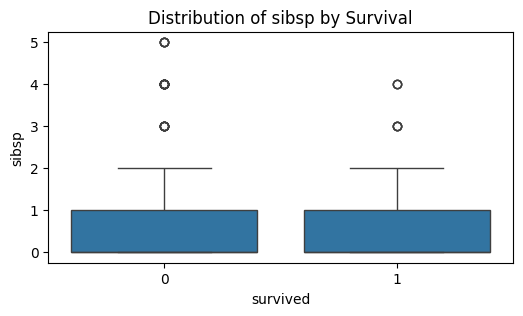

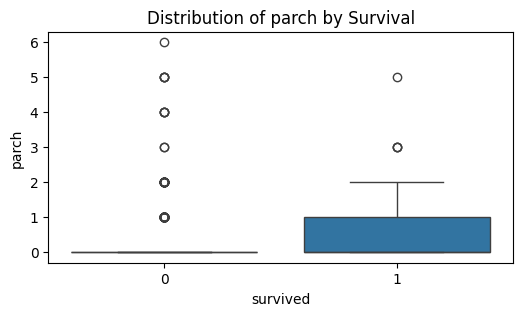

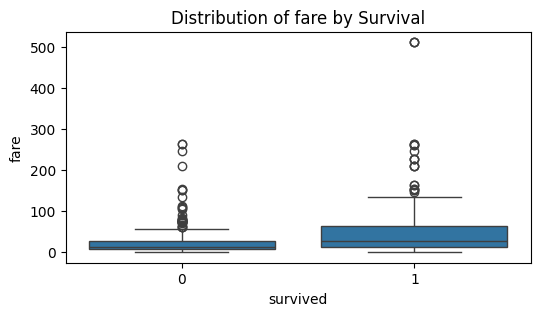

In [15]:
for feature in numeric_cols:
    plot_numeric_feature(objective, feature)

Correlated Features

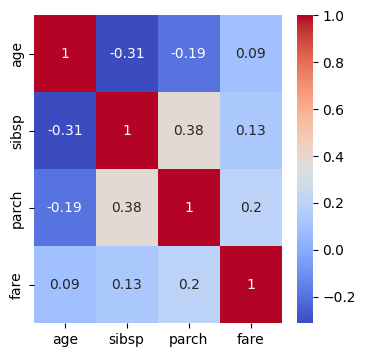

In [16]:
corr_map = df[numeric_cols].corr()
plt.figure(figsize=(len(numeric_cols), len(numeric_cols)))
sns.heatmap(corr_map, annot=True, cmap='coolwarm')
plt.show()

# A Fun reading exercise:
Data Processing Inequality: _Post-processing cannot increase information_

https://en.wikipedia.org/wiki/Data_processing_inequality